<a href="https://colab.research.google.com/github/bhgtankita/MYWORK/blob/master/MNIST_99_28_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


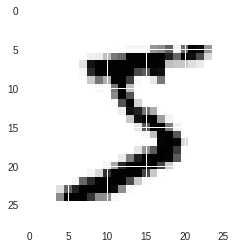

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipy

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 22, 22, 16)        528       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0128 - acc: 0.9961
Epoch 2/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0101 - acc: 0.9970
Epoch 3/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0087 - acc: 0.9975
Epoch 4/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0078 - acc: 0.9977
Epoch 5/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0072 - acc: 0.9977
Epoch 6/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0065 - acc: 0.9983
Epoch 7/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.0061 - acc: 0.9985
Epoch 8/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.0056 - acc: 0.9987
Epoch 9/10
60000/60000 [==============================] - 18s 298us/step - loss: 0.0051 - acc: 0.9989
Epoch 10/10
60000/60000 [==============================] - 18s 298us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.030972063180437773, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.9109690e-07 2.6795985e-07 7.5975739e-05 8.0563095e-06 5.6089846e-07
  8.1035632e-09 3.0123365e-13 9.9810636e-01 1.8478222e-07 1.8084128e-03]
 [5.9375398e-05 1.5948715e-03 9.9832457e-01 5.1281461e-08 3.4854330e-07
  1.7451091e-09 1.6076241e-05 2.3723321e-07 4.5413490e-06 2.2636375e-10]
 [1.0635635e-08 9.9974900e-01 4.5497873e-05 2.6472952e-07 8.9350993e-05
  2.9765886e-06 1.8817823e-07 1.1298250e-05 9.6548647e-05 4.8157522e-06]
 [9.9853814e-01 1.8622445e-07 3.0471294e-05 7.9137171e-06 5.9114605e-05
  9.9305456e-05 1.2131896e-03 2.5176523e-05 2.4972902e-05 1.5597991e-06]
 [5.6511479e-10 3.9642188e-07 4.2221610e-10 1.0943336e-08 9.9979860e-01
  6.5657818e-10 2.9832115e-09 1.3550259e-07 4.5718613e-07 2.0046903e-04]
 [1.4354144e-10 9.9993598e-01 2.0004964e-06 3.5674500e-08 4.9769420e-05
  2.8544650e-07 2.3942177e-09 2.7972815e-06 7.5292583e-06 1.6405006e-06]
 [4.3745278e-13 6.7539031e-06 7.9726725e-10 3.8043527e-10 9.9988925e-01
  1.3387902e-09 1.0379274e-11 1.8837845e-05 2.5126602e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored